In [13]:
import pandas as pd
import matplotlib.pyplot as plt


In [4]:
df = pd.read_csv('/Users/bpb/Downloads/20160801_C18_ACN___FPS_Msonly_KBL_MO_Qex_UV_QCMix_Pre____1001_A_135to2000__Run3.csv')

In [5]:
df.head()

,Unnamed: 0,200,202,204,206,208,210,212,214,216,...,624,626,628,630,632,634,636,638,640,Unnamed: 222
0,0.001667,580326,377025,-237834,-229395,-325293,19855,258680,230955,399841,...,6268,10408,4072,16266,8020,3674,5029,1929,9731,NaN
1,0.003333,489171,338544,-258169,-340846,-330565,74333,203253,214254,393532,...,6132,10943,3752,16474,8828,3907,5465,2214,10621,NaN
2,0.005000,434992,348052,-227965,-428514,-345122,127378,214734,254230,382071,...,5876,11584,3624,16341,8908,3723,5334,1603,10790,NaN
3,0.006667,386420,405025,-137718,-459113,-354752,189464,297155,314341,361403,...,5762,12180,3593,16077,8582,3130,4499,263,10280,NaN
4,0.008333,310123,468200,-34776,-450522,-361333,233087,414636,392519,347820,...,5864,12568,3660,15812,8226,2861,3724,-893,9517,NaN


# Grab the retention time

In [8]:
rt = df['Unnamed: 0'].tolist()

In [34]:
df.drop([k for k in df.keys() if k.startswith('Unnamed')], axis=1, inplace=True)


In [35]:
wavelength = df.keys()

In [36]:
values = df.as_matrix()

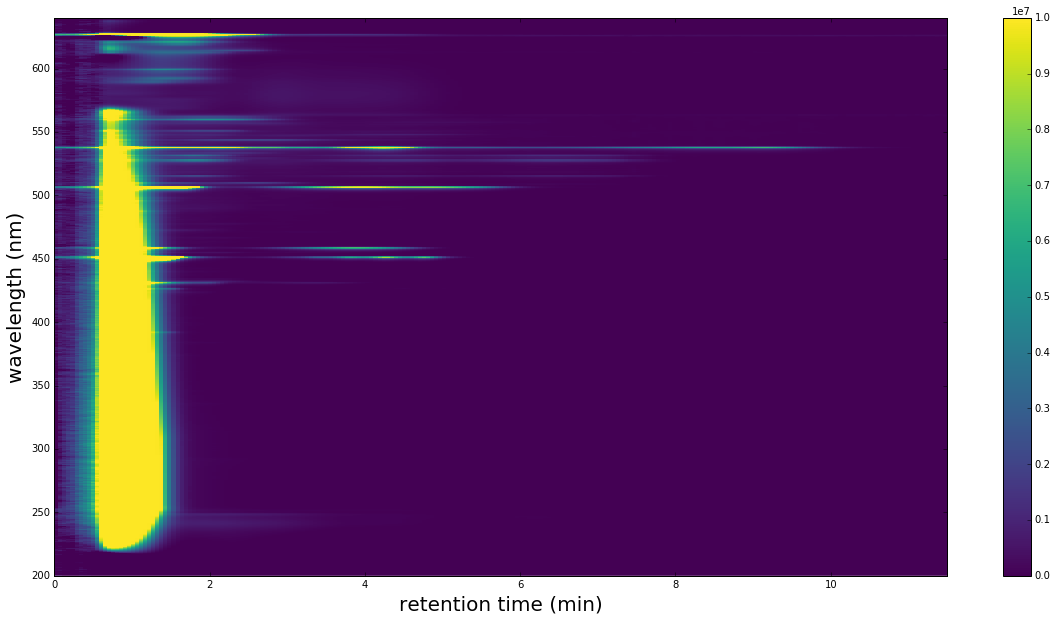

In [51]:
fig = plt.figure(figsize = (20,10))
plt.imshow((values+1.0),interpolation='none',extent=[float(rt[0]),float(rt[-1]),
                                                     float(wavelength[0]),float(wavelength[-1])],
           aspect='auto',
          vmin=0, vmax=1e7,cmap = 'viridis')

plt.xlabel('retention time (min)',fontsize=20)
plt.ylabel('wavelength (nm)',fontsize=20)
plt.colorbar()
plt.show()
fig.savefig('light absorbance.png')